In [6]:
import geopandas as gpd
import pandas as pd
import os

PLACES OF WORKSHIP

In [86]:
# Load Places of worship (area), take centroid
gdf_pofw = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_pofw_a_free_1.shp'))
#centroid
gdf_pofw.to_crs(epsg=27700, inplace=True)
gdf_pofw['geometry'] = gdf_pofw.centroid

# Load Places of worship (point)
gdf_pofw_pt = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_pofw_free_1.shp'))
gdf_pofw_pt.to_crs(epsg=27700, inplace=True)

In [158]:
#merge two datasets together
gdf_pofw_merged = pd.concat([gdf_pofw, gdf_pofw_pt], ignore_index=True)
gdf_pofw_merged['category']='religious'
gdf_pofw_merged.tail()

,osm_id,code,fclass,name,geometry,category
3096,11479357650,3103,christian_evangelical,UCKG Help Centre,POINT (539092.764 184583.684),religious
3097,11543657111,3300,muslim,Chadwell Heath Muslim Centre,POINT (547336.060 187774.258),religious
3098,11544241893,3100,christian,West Wickham Methodist Church,POINT (538761.375 165985.736),religious
3099,11780635078,3300,muslim,Limehouse Bangladeshi Cultural Centre,POINT (536918.189 180871.930),religious
3100,11780635081,3300,muslim,None,POINT (536935.615 180861.505),religious


Text(0.5, 1.0, 'Places of Worship')

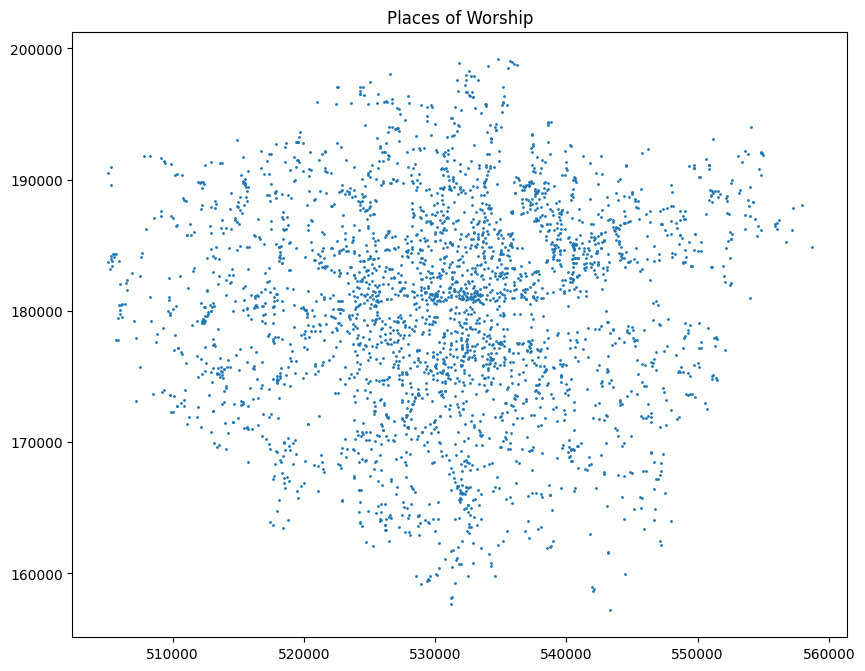

In [126]:
#plot, title POW, no axis
gdf_pofw_merged.plot(markersize=1, figsize=(10,10),).set_title('Places of Worship')

POINT OF INTEREST

In [163]:
# Load Points of interest (area), take centroid
gdf_poi = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_pois_a_free_1.shp'))
gdf_poi.to_crs(epsg=27700, inplace=True)
gdf_poi['geometry'] = gdf_poi.centroid

# Load Points of interest (point)
gdf_poi_pt = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_pois_free_1.shp'))
gdf_poi_pt.to_crs(epsg=27700, inplace=True)

In [164]:
#merge two datasets together
gdf_poi_merged = pd.concat([gdf_poi, gdf_poi_pt], ignore_index=True)
gdf_poi_merged.tail()

,osm_id,code,fclass,name,geometry
134864,11871881153,2561,hairdresser,"AB Barbers, Nails & Beauty",POINT (532435.230 177888.268)
134865,11871885714,2301,restaurant,We Are Mixed Blessings,POINT (532429.509 177860.099)
134866,11871901022,2561,hairdresser,Back To Eden,POINT (532419.012 177829.113)
134867,11871927672,2542,bicycle_shop,Community Bike Shop,POINT (531800.451 177392.099)
134868,11871927780,2561,hairdresser,Lugie’s Salon,POINT (532402.866 177793.318)


In [165]:
# add new column, extract first 2 digits of code column
gdf_poi_merged['category_code'] = gdf_poi_merged['code'].astype('string').str[:2]


# add new column, value depends on category column, 20 is restaurant, 25 is culture

poi_dict = {
    '20':'public_facilities',
    '21':'medical',
    '22':'culture_leisure',
    '23':'restaurants',
    '24':'hotels',
    '25':'shopping',
    '26':'banking',
    '27':'tourism',
    '29':'miscellaneous'
    }

gdf_poi_merged['category'] = gdf_poi_merged['category_code'].map(poi_dict)

# drop category_code

gdf_poi_merged.drop(columns=['category_code'], inplace=True)


,osm_id,code,fclass,name,geometry,category
134864,11871881153,2561,hairdresser,"AB Barbers, Nails & Beauty",POINT (532435.230 177888.268),shopping
134865,11871885714,2301,restaurant,We Are Mixed Blessings,POINT (532429.509 177860.099),restaurants
134866,11871901022,2561,hairdresser,Back To Eden,POINT (532419.012 177829.113),shopping
134867,11871927672,2542,bicycle_shop,Community Bike Shop,POINT (531800.451 177392.099),shopping
134868,11871927780,2561,hairdresser,Lugie’s Salon,POINT (532402.866 177793.318),shopping


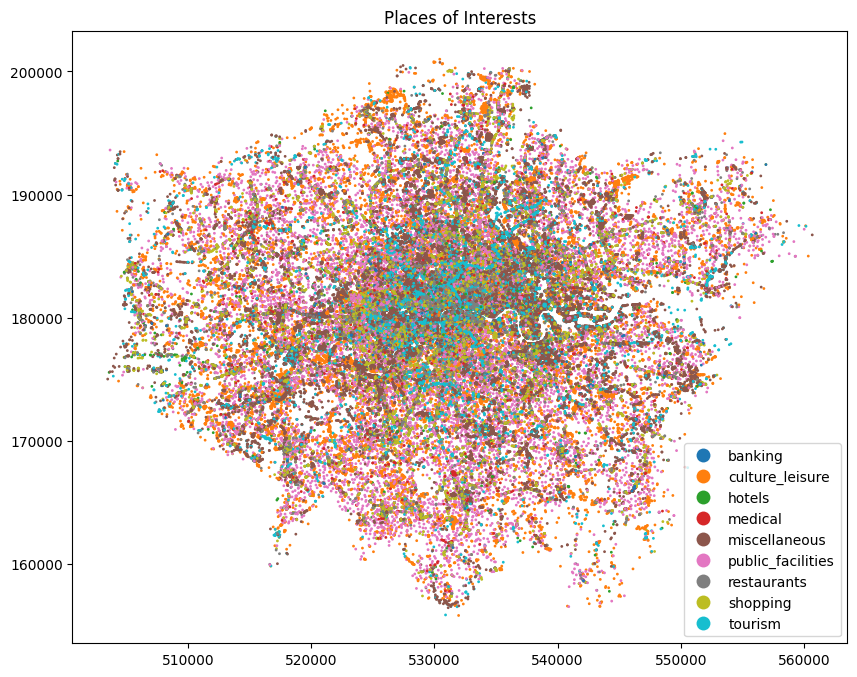

In [166]:
#plot
gdf_poi_merged.plot(markersize=1, figsize=(10,10),column='category',legend=True).set_title('Places of Interests')
gdf_poi_merged.tail()

TRANSPORT

In [ ]:
transport_list =['bus_station','railway_station','airport','ferry_terminal','airfield','taxi','helipad']


In [120]:
# load transport
gdf_transport = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_transport_free_1.shp'))
gdf_transport.to_crs(epsg=27700, inplace=True)
gdf_transport = gdf_transport[gdf_transport.fclass.isin(transport_list)]

# load transport_a, take centroids
gdf_transport_a = gpd.read_file(os.path.join('data','osm','greater-london-latest-free.shp','gis_osm_transport_a_free_1.shp'))
gdf_transport_a.to_crs(epsg=27700, inplace=True)
gdf_transport_a['geometry'] = gdf_transport_a.centroid
gdf_transport_a = gdf_transport_a[gdf_transport_a.fclass.isin(transport_list)]

,osm_id,code,fclass,name,geometry,category
1025,1226993763,5641,taxi,None,POINT (537869.985 183491.280),transport
1026,1226993764,5641,taxi,None,POINT (537815.611 183439.870),transport
1027,1229484499,5641,taxi,None,POINT (538625.266 184315.342),transport
1028,1230665737,5655,helipad,Foxtrot Taxiway Helipad,POINT (541578.828 160176.968),transport
1029,1244577739,5655,helipad,None,POINT (552424.820 178880.401),transport


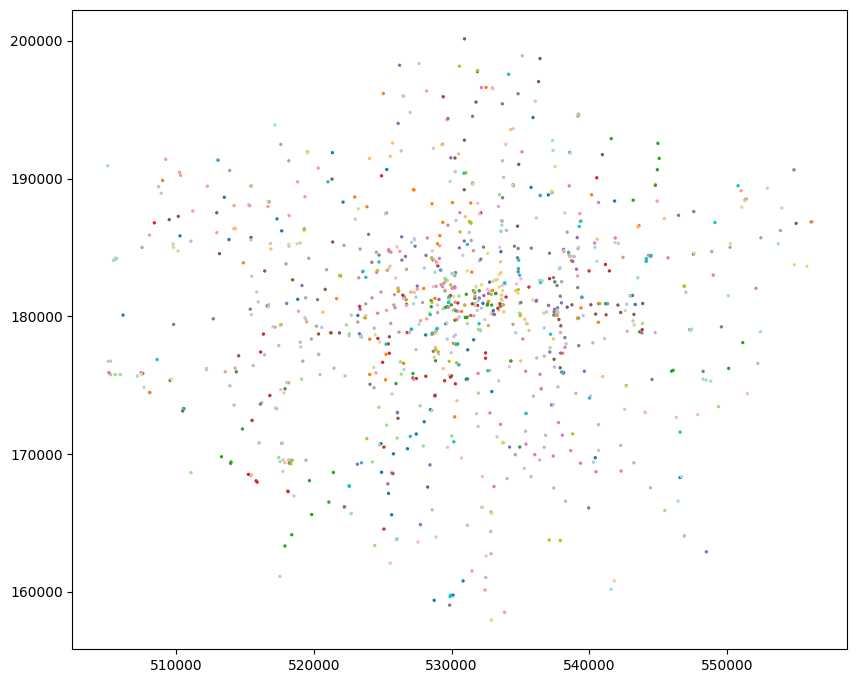

In [159]:
# merge
gdf_transport_merged = pd.concat([gdf_transport, gdf_transport_a], ignore_index=True)
gdf_transport_merged['category']='transport'

# plot and color by fclass
gdf_transport_merged.plot(markersize=2, figsize=(10,10),legend=True,cmap='tab20')
gdf_transport_merged.tail()


Text(0.5, 1.0, 'All Points of Interest')

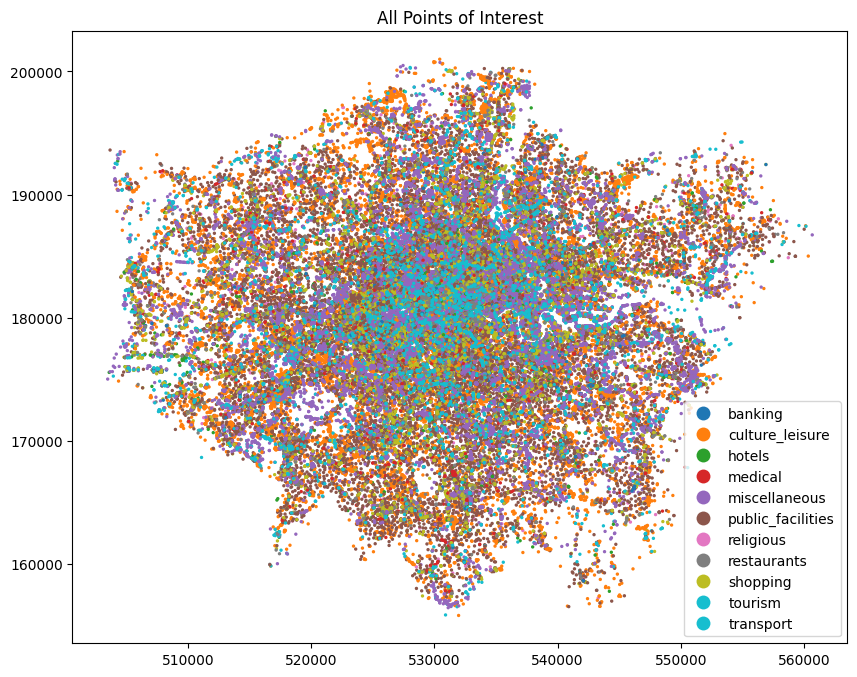

In [170]:
# Merge everything

gdf_poi_all = pd.concat([gdf_pofw_merged, gdf_poi_merged, gdf_transport_merged], ignore_index=True)
gdf_poi_all.to_crs(epsg=27700, inplace=True)
gdf_poi_all.plot(markersize=2, figsize=(10,10),column='category',legend=True).set_title('All Points of Interest')

In [190]:
# Load OA shapefile

oa = gpd.read_file(os.path.join('data','statistical-gis-boundaries-london','ESRI','OA_2011_London_gen_MHW.shp'))
oa.to_crs(epsg=27700, inplace=True)


In [195]:
# Spatial join, summarise by count for each category
poi_oa = gpd.sjoin(gdf_poi_all, oa, how='inner', predicate='intersects')
poi_oa_summary = poi_oa.groupby(['OA11CD','category']).size().reset_index(name='count')

#pivot then 
poi_oa_summary_pivot = poi_oa_summary.pivot(index='OA11CD', columns='category', values='count').fillna(0)
poi_oa_summary_pivot.head()

# rejoin oa
oa_poi = oa.merge(poi_oa_summary_pivot, on='OA11CD', how='left')

oa_poi.head()


,OA11CD,LSOA11CD,MSOA11CD,WD11CD_BF,WD11NM_BF,LAD11CD,LAD11NM,RGN11CD,RGN11NM,LSOA11NM,...,culture_leisure,hotels,medical,miscellaneous,public_facilities,religious,restaurants,shopping,tourism,transport
0,E00023264,E01004612,E02000954,E05000626,Tooting,E09000032,Wandsworth,E12000007,London,Wandsworth 032C,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,E00003359,E01000692,E02000128,E05000111,Chislehurst,E09000006,Bromley,E12000007,London,Bromley 002D,...,0.0,0.0,3.0,3.0,3.0,1.0,11.0,6.0,0.0,0.0
2,E00023266,E01004615,E02000956,E05000626,Tooting,E09000032,Wandsworth,E12000007,London,Wandsworth 034B,...,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,E00020264,E01004027,E02000809,E05000548,Riverside,E09000028,Southwark,E12000007,London,Southwark 003E,...,3.0,1.0,0.0,12.0,2.0,0.0,5.0,0.0,3.0,0.0
4,E00023263,E01004613,E02000955,E05000626,Tooting,E09000032,Wandsworth,E12000007,London,Wandsworth 033D,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0


In [202]:
oa_poi.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 25053 entries, 0 to 25052
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   OA11CD             25053 non-null  object  
 1   LSOA11CD           25053 non-null  object  
 2   MSOA11CD           25053 non-null  object  
 3   WD11CD_BF          25053 non-null  object  
 4   WD11NM_BF          25053 non-null  object  
 5   LAD11CD            25053 non-null  object  
 6   LAD11NM            25053 non-null  object  
 7   RGN11CD            25053 non-null  object  
 8   RGN11NM            25053 non-null  object  
 9   LSOA11NM           25053 non-null  object  
 10  MSOA11NM           25053 non-null  object  
 11  USUALRES           25053 non-null  int64   
 12  HHOLDRES           25053 non-null  int64   
 13  COMESTRES          25053 non-null  int64   
 14  POPDEN             25053 non-null  float64 
 15  HHOLDS             25053 non-null  int64   
 

Text(0.5, 1.0, 'POIs by type')

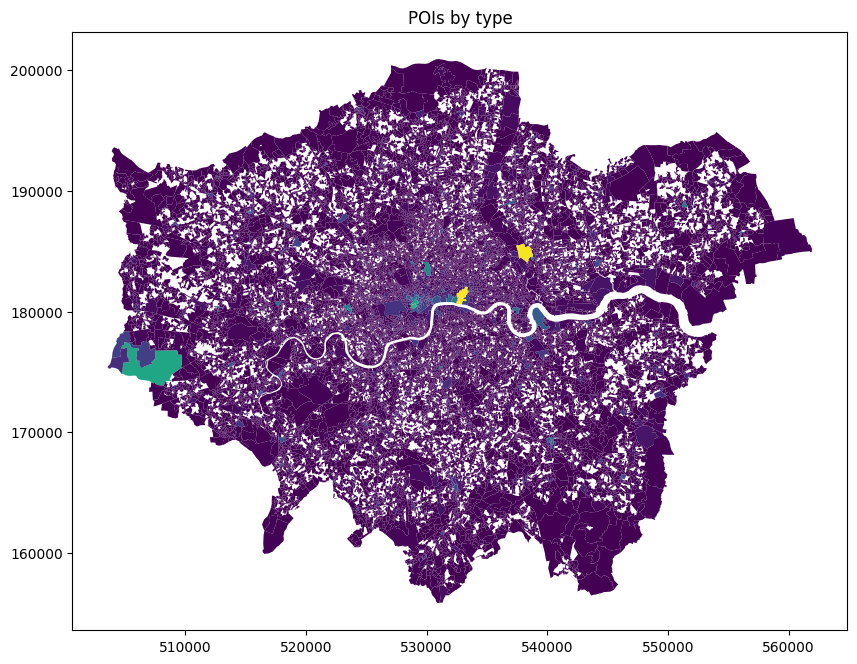

In [201]:
oa_poi.plot(figsize=(10,10),column='culture').set_title('POIs by type')

In [203]:
#export to geojson
oa_poi.to_file(os.path.join('data','oa_poi_types.geojson'), driver='GeoJSON')